In [1]:
!pip install scikit-learn

In [3]:
!pip install pandas


In [5]:
!pip install "numpy<2" --upgrade --force-reinstall
!pip install --upgrade pandas scikit-learn

  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires packaging<25,>=20, but you have packaging 25.0 which is incompatible.
streamlit 1.37.1 requires rich<14,>=10.14.0, but you have rich 14.0.0 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


  Using cached pandas-2.3.0-cp312-cp312-win_amd64.whl.metadata (19 kB)
Using cached pandas-2.3.0-cp312-cp312-win_amd64.whl (11.0 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires packaging<25,>=20, but you have packaging 25.0 which is incompatible.
streamlit 1.37.1 requires rich<14,>=10.14.0, but you have rich 14.0.0 which is incompatible.


In [6]:
!pip install --upgrade numpy pandas scikit-learn

  Using cached numpy-2.3.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.6 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
streamlit 1.37.1 requires packaging<25,>=20, but you have packaging 25.0 which is incompatible.
streamlit 1.37.1 requires rich<14,>=10.14.0, but you have rich 14.0.0 which is incompatible.


In [9]:
!pip install pandas==2.1.4  


  Using cached pandas-2.1.4-cp312-cp312-win_amd64.whl.metadata (18 kB)
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached pandas-2.1.4-cp312-cp312-win_amd64.whl (10.5 MB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
  Attempting uninstall: pandas
    Found existing installation: pandas 2.3.0
    Uninstalling pandas-2.3.0:
      Successfully uninstalled pandas-2.3.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires packaging<25,>=20, but you have packaging 25.0 which is incompatible.
streamlit 1.37.1 requires rich<14,>=10.14.0, but you have rich 14.0.0 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [11]:
!pip install --upgrade scikit-learn

Accuracy: 0.87

Classification Report: 
              precision    recall  f1-score   support

         Bad       0.79      0.90      0.84       706
        Good       0.93      0.86      0.89      1166

    accuracy                           0.87      1872
   macro avg       0.86      0.88      0.87      1872
weighted avg       0.88      0.87      0.87      1872



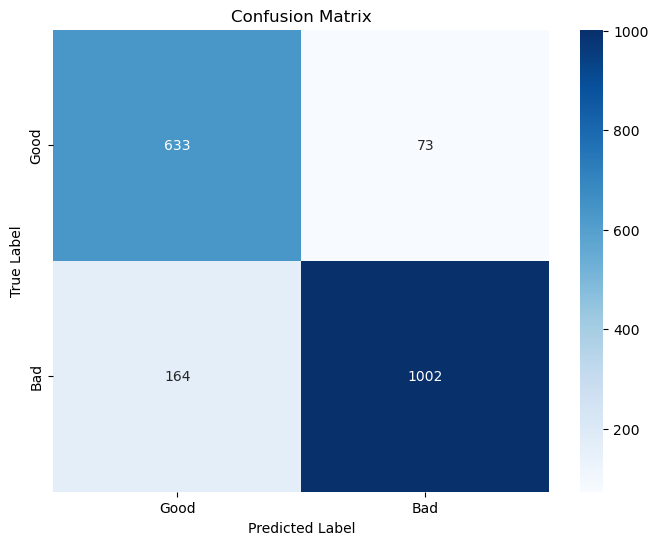


Prediction for Air Quality: Good


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Loading the data in proper format
df = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',')

#Converting comma to dot for decimal
numeric_cols = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'CO(GT)']
for col in numeric_cols:
    if df[col].dtype == object:
        df[col] = df[col].str.replace(',', '.').astype(float)

#Drop rows where all feature columns are missing
features = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)']
df = df.dropna(subset=features + ['CO(GT)'])

#Check if DataFrame is empty
if df.empty:
    raise ValueError("The DataFrame is empty after dropping missing values. Check your data.")

#Classifying air quality as Good or Bad(Values used here by me are not standard)
df['Air_Quality'] = ['Good' if x < 2 else 'Bad' for x in df['CO(GT)']]

#Data prepare for features and target
x = df[features]
y = df['Air_Quality']

#Split the data to traning and testing
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Training the model
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, Y_train)

#Making prediction using trained model
Y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(Y_test, Y_pred):.2f}')
print("\nClassification Report: ")
print(classification_report(Y_test, Y_pred))

#Confusion Matrix's in Heatmap
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Good', 'Bad'], 
            yticklabels=['Good', 'Bad'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

def predict_quality(sensor_val):#this is main function to start this process
    sample = pd.DataFrame([sensor_val])#converting input vals to DataFrames
    prediction = model.predict(sample)[0]
    return f'Prediction for Air Quality: {prediction}'

#Giving one test sample for prediction
testSample = {'PT08.S1(CO)': 1200, 'PT08.S2(NMHC)': 900, 'PT08.S3(NOx)': 800, 'PT08.S4(NO2)': 1200}

print("\n" + predict_quality(testSample))


In [17]:
testSample2 = {'PT08.S1(CO)': 2000, 'PT08.S2(NMHC)': 1900, 'PT08.S3(NOx)': 800, 'PT08.S4(NO2)': 1200}

print("\n" + predict_quality(testSample2))



Prediction for Air Quality: Bad
